## **Project Description**



This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.
This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

In [59]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import linear_model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
trainX = pd.read_table('/content/gdrive/My Drive/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('/content/gdrive/My Drive/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("/content/gdrive/My Drive/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

# **EDA**

In [4]:
#Normalizing dataset by subtracting with mean and divide by std

mu = trainX.mean(axis=0)
mu1 = testX.mean(axis=0)
stdv = trainX.std(axis = 0)
stdv1 = testX.std(axis = 0)

X_train = (trainX - mu)/stdv   #normalized train set
X_test = (testX - mu1)/stdv1  #normalized test set
y_train = trainy              #train set of labels
y_test = testy               #test set of label 
y = np.array(y_train).ravel()

In [5]:
y_test[0].unique()

array([5, 4, 6, 1, 3, 2])

In [6]:
len(y_test)

2947

Y_Labels(Encoded): In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers. 


WALKING as 1 


WALKING_UPSTAIRS as 2 


WALKING_DOWNSTAIRS as 3 


SITTING as 4 


STANDING as 5 


LAYING as 6

In [7]:
act = {1:"WALKING", 2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

Text(0.5, 0, 'Activity')

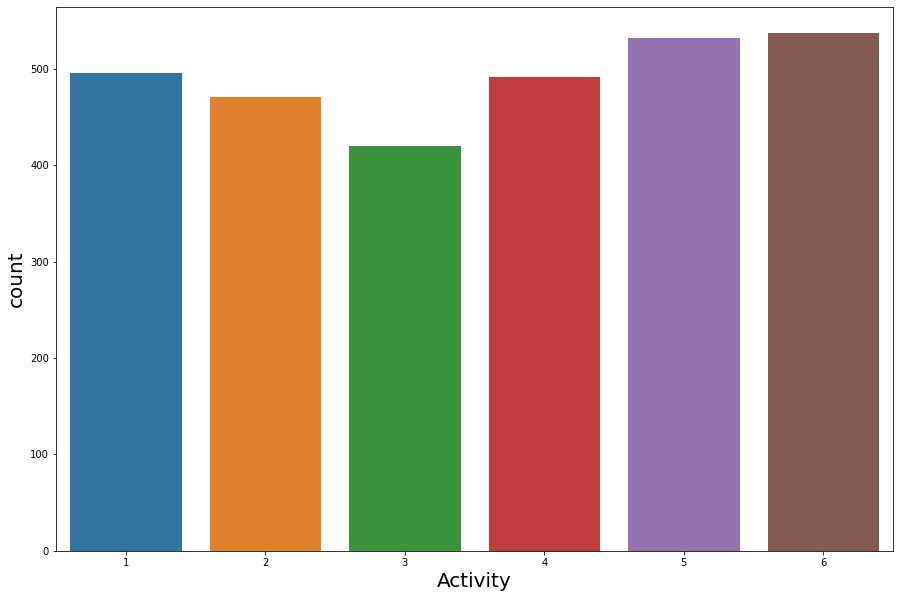

In [8]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.countplot(y_test[0])
plt.ylabel('count',fontsize=20)
plt.xlabel('Activity',fontsize=20)

Text(0.5, 0, 'Activity')

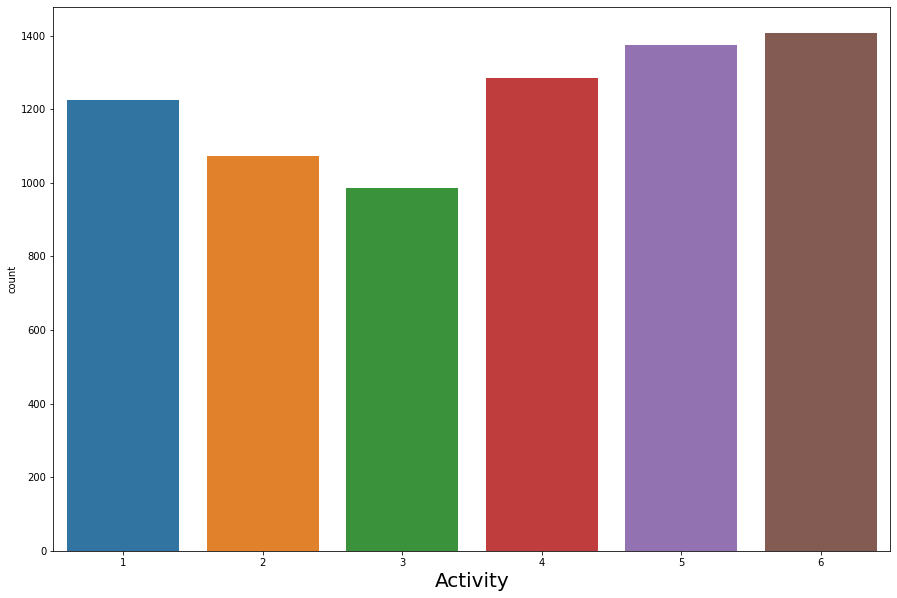

In [9]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.countplot(y_train[0])
plt.xlabel("Activity",fontsize=20)


In [10]:
features=pd.read_table('/content/gdrive/My Drive/UCI HAR Dataset/features.txt',delim_whitespace=True,header=None)

In [11]:
features


,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [12]:
f=list(features[1])

In [13]:
features.head()

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [14]:
len(f)

561

In [15]:
X_train.columns


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

In [16]:
d={}
for i in range(0,len(f)):
  d[i]=f[i]
print(d) 

{0: 'tBodyAcc-mean()-X', 1: 'tBodyAcc-mean()-Y', 2: 'tBodyAcc-mean()-Z', 3: 'tBodyAcc-std()-X', 4: 'tBodyAcc-std()-Y', 5: 'tBodyAcc-std()-Z', 6: 'tBodyAcc-mad()-X', 7: 'tBodyAcc-mad()-Y', 8: 'tBodyAcc-mad()-Z', 9: 'tBodyAcc-max()-X', 10: 'tBodyAcc-max()-Y', 11: 'tBodyAcc-max()-Z', 12: 'tBodyAcc-min()-X', 13: 'tBodyAcc-min()-Y', 14: 'tBodyAcc-min()-Z', 15: 'tBodyAcc-sma()', 16: 'tBodyAcc-energy()-X', 17: 'tBodyAcc-energy()-Y', 18: 'tBodyAcc-energy()-Z', 19: 'tBodyAcc-iqr()-X', 20: 'tBodyAcc-iqr()-Y', 21: 'tBodyAcc-iqr()-Z', 22: 'tBodyAcc-entropy()-X', 23: 'tBodyAcc-entropy()-Y', 24: 'tBodyAcc-entropy()-Z', 25: 'tBodyAcc-arCoeff()-X,1', 26: 'tBodyAcc-arCoeff()-X,2', 27: 'tBodyAcc-arCoeff()-X,3', 28: 'tBodyAcc-arCoeff()-X,4', 29: 'tBodyAcc-arCoeff()-Y,1', 30: 'tBodyAcc-arCoeff()-Y,2', 31: 'tBodyAcc-arCoeff()-Y,3', 32: 'tBodyAcc-arCoeff()-Y,4', 33: 'tBodyAcc-arCoeff()-Z,1', 34: 'tBodyAcc-arCoeff()-Z,2', 35: 'tBodyAcc-arCoeff()-Z,3', 36: 'tBodyAcc-arCoeff()-Z,4', 37: 'tBodyAcc-correlation()

In [17]:
X_train.rename(columns=d,inplace=True)
X_test.rename(columns=d,inplace=True)

In [18]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.277661,-0.210595,2.192704,-0.787134,-0.833071,-0.093428,-0.807954,-0.838871,-0.104160,-0.824606,-0.917810,0.429119,0.553998,0.736578,0.671360,-0.724224,-0.749151,-0.748380,-0.366156,-0.842049,-0.847803,-0.499409,-0.167049,-0.644391,1.081946,2.079256,-2.463693,1.988002,-0.620985,1.013683,-0.858099,-0.058995,0.000751,-0.383955,0.116159,-0.841318,0.587193,0.539517,-0.914506,-2.286863,...,-0.701974,-0.708444,-0.256858,-0.638311,-0.787543,0.022537,-0.357312,-0.213802,-0.287413,-0.228313,-0.265177,-0.298136,-0.213802,-0.501255,-0.243586,0.391454,-0.719531,-0.066506,-0.569781,-0.528980,-0.444526,-0.476103,-0.465086,-0.480194,-0.224604,-0.444526,-0.522675,-0.481193,0.022839,-0.742541,-0.253620,-0.166362,-0.344707,0.003565,0.357512,-1.363669,0.575389,-0.404722,0.622618,-0.038342
1,0.198626,0.182560,-0.250221,-0.876836,-0.928903,-0.857905,-0.896993,-0.928791,-0.863122,-0.824606,-0.917810,-0.911639,0.704138,0.884125,0.697899,-0.934606,-0.757707,-0.758225,-0.769473,-0.898302,-0.913574,-0.861592,-0.468749,-0.571833,-0.729154,2.035127,-1.127527,0.275918,0.730582,0.955393,-1.142368,1.289991,-1.500885,0.294738,-0.623604,0.026333,0.365441,0.009598,-0.716027,0.864409,...,-0.720664,-0.809689,-0.619992,-0.638311,-2.617691,0.125523,-0.265139,-0.738276,-0.720441,-0.748056,-0.660132,-0.691610,-0.738276,-0.673284,-0.709465,-0.296071,-0.719531,-0.008286,0.644103,0.464942,-0.695639,-0.603364,-0.629947,-0.618018,-0.652699,-0.695639,-0.565427,-0.690693,-0.300571,-0.742541,-2.300359,0.490938,0.012254,-0.264048,0.030782,-0.747105,1.870875,-0.361677,0.636623,-0.145684
2,0.024583,-0.318001,-0.228446,-0.921442,-0.933896,-0.906953,-0.916735,-0.933654,-0.912484,-0.910827,-0.968654,-0.884426,0.941282,0.835651,0.792640,-0.952310,-0.759474,-0.757619,-0.775835,-0.896614,-0.915312,-0.904533,-1.177182,-1.391138,-1.096123,1.181117,-0.960161,0.245016,0.388477,0.106670,-0.517272,1.575643,-2.269118,0.705154,-1.316334,2.530072,-2.025302,1.205408,-0.375751,0.524904,...,-0.728156,-0.869368,-0.884884,-0.638311,-0.080607,0.150291,-0.194790,-0.911277,-0

In [19]:
X_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
7347,0.358337,-0.967838,-1.272919,0.913797,1.095888,1.628501,0.821113,1.174057,1.609576,1.247642,1.188380,1.634822,-0.687776,-0.584263,-1.099523,1.162055,0.558748,0.900768,1.677253,0.493136,1.285245,1.720481,0.636805,0.635983,0.220454,-1.451869,1.312571,-0.166109,-0.813799,-0.263717,0.338689,-1.339741,1.412112,-1.519865,1.085105,-1.024025,0.948447,-0.238718,-0.174497,-1.007685,...,0.473557,1.011915,1.048541,-0.141899,-0.964888,0.658766,0.546877,1.075908,1.744303,1.590552,1.621940,-0.633815,1.075908,1.393811,1.340402,1.087707,-0.050704,-1.166462,0.253512,0.041414,0.356430,0.257842,0.436063,0.048482,-0.275747,0.356430,-0.110379,0.599570,0.943837,-0.041239,-0.778705,-0.876679,-0.829141,-0.591237,1.845908,0.325901,-0.877949,-0.590723,0.605121,0.380958
7348,-0.009044,0.243714,-0.676741,0.824831,1.026080,1.585992,0.726196,1.023685,1.658294,1.076206,1.188380,1.787049,-0.663863,-0.536961,-1.099523,1.073019,0.437899,0.770403,1.576679,0.442101,0.979347,1.701207,0.599478,0.986815,0.302707,-0.799528,0.190971,1.004064,-1.239633,0.229051,-0.388656,-0.601931,1.171511,-1.306968,0.407071,0.644003,-0.553645,-0.202186,-0.096834,-0.984770,...,0.287670,0.822053,1.058623,-0.141899,-1.466537,0.449176,0.306933,1.000571,1.566551,1.352467,2.029739,-0.178648,1.000571,1.164110,0.916890,1.158112,0.274581,-0.883238,0.836664,0.882499,0.350413,0.079901,0.159230,0.129965,0.569178,0.350413,-0.153206,0.352724,0.780725,-0.041239,0.159230,-0.260829,-0.180278,0.166940,1.948429,-1.459402,0.849836,-0.551560,0.652423,0.381794
7349,-0.015667,0.016780,1.132144,0.862916,0.809947,2.100106,0.768729,0.880753,2.266809,0.941339,0.693156,2.084383,-0.716117,-0.536961,-1.107069,1.177603,0.488733,0.455896,2.588447,0.526699,1.057768,2.497471,0.588801,0.946734,0.850783,-0.848837,0.397507,0.416070,-0.641102,0.085110,-0.229651,-0.191553,0.452797,-1.501365,0.760431,-0.297877,0.409514,-0.280033,0.027490,-0.787425,...,0.175579,0.509494,0.802194,-0.141899,-0.674259,1.796905,2.025386,1.018613,2.046105,1.402519,3.050287,-0.501207,1.018613,1.708964,1.499833,1.099545,0.27

In [20]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,...,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03,7.352000e+03
mean,8.381882e-15,1.345798e-16,-5.320221e-15,-1.979555e-15,-2.678262e-15,-3.624866e-15,-4.231276e-15,2.603829e-15,2.975676e-15,3.792759e-16,4.669672e-16,9.280540e-15,2.154878e-15,8.938111e-16,-7.813723e-15,-1.114602e-15,3.546719e-15,2.488538e-14,1.824601e-14,7.691103e-15,-2.020932e-15,2.557500e-15,-5.158339e-16,-5.241545e-16,4.876668e-16,-1.130156e-16,3.509465e-17,-8.373486e-17,1.339501e-15,4.041321e-16,2.798511e-16,1.591068e-15,1.183010e-16,-1.414054e-16,1.935944e-17,3.558769e-16,-3.346374e-16,2.071173e-16,1.193580e-16,-1.178026e-16,...,1.543394e-15,-4.069378e-15,-2.211204e-15,2.418265e-13,-8.295565e-16,-1.405499e-16,1.850367e-15,-2.649042e-15,-1.327375e-16,2.992981e-15,6.203477e-16,7.175496e-15,-2.649042e-15,-2.328539e-15,-3.365099e-16,-6.204987e-17,-8.778841e-15,2.610957e-16,1.471982e-15,2.557847e-15,4.057656e-15,-5.118831e-15,8.392513e-15,-3.303219e-15,1.220064e-14,4.057656e-15,2.020116e-14,-7.776114e-15,-4.346058e-16,3.103142e-13,-1.503754e-15,1.120495e-15,-7.024781e-15,4.7

In [21]:
X_test.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,...,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03,2.947000e+03
mean,3.373616e-15,-3.495806e-16,-4.327760e-15,3.270694e-15,2.277747e-15,1.703121e-15,2.428514e-15,1.487593e-15,4.836232e-15,2.143668e-15,7.670221e-16,1.747499e-15,-8.004004e-16,1.730320e-16,1.411456e-15,-1.729190e-17,1.359471e-14,-2.208190e-14,2.018519e-16,4.297075e-15,1.371448e-15,-1.808304e-15,-1.035065e-16,-3.077507e-16,3.200697e-16,-1.302732e-16,4.046079e-16,-9.169606e-17,-1.242455e-16,1.178788e-16,-3.316165e-17,-9.003091e-16,1.016041e-16,-8.514096e-17,-1.564183e-16,1.142151e-16,-6.049906e-16,-2.783799e-16,8.783834e-16,-4.078054e-16,...,-7.841237e-15,-4.170588e-15,5.129178e-16,-3.361099e-14,1.590973e-15,-3.950766e-16,-1.382749e-15,1.430180e-15,8.963535e-16,3.627156e-16,3.512893e-15,-7.768227e-15,1.430180e-15,-2.258015e-15,4.322900e-15,9.527499e-17,-3.877973e-14,-5.908067e-17,2.512082e-16,-1.295423e-15,-4.352022e-15,1.543387e-15,-7.793600e-15,-4.580697e-15,-2.496043e-15,-4.352022e-15,1.582341e-15,5.084384e-15,1.255829e-15,-6.635107e-14,1.086225e-15,1.401435e-16,-8.138119e-16,

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [23]:
print("training data size",X_train.shape)
print("training labels size",y_train.shape)

training data size (7352, 561)
training labels size (7352, 1)


In [24]:
print("testing data size",X_test.shape)
print("testing label size",y_test.shape)

testing data size (2947, 561)
testing label size (2947, 1)


In [25]:
X_train.isnull()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [26]:
X_test.isnull()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [27]:
X_train.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [28]:
X_test.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

In [29]:
X_train.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.148061,-0.256952,0.000619,-0.021903,-0.044617,0.006290,-0.022754,-0.047558,0.044062,-0.007875,-0.075881,0.078354,0.021214,-0.003283,-0.029204,0.016582,-0.040811,-0.085116,0.020762,-0.024179,-0.054570,0.148508,0.006747,-0.084416,0.019447,0.012241,-0.041704,0.049486,0.023920,0.011185,-0.045147,0.056905,0.036627,0.008888,-0.019158,0.001150,0.027287,0.089583,-0.010590,...,0.032546,0.020264,-0.007249,0.017466,0.055514,-0.032586,-0.027283,-0.005990,-0.025629,-0.021627,-0.028736,0.002004,-0.005990,-0.012038,-0.003913,-0.017451,0.034239,0.050053,-0.017158,-0.012325,0.008362,0.006094,0.006916,0.006751,0.007878,0.008362,0.017109,0.011356,-0.015953,0.008751,0.030681,-0.017557,-0.015613,-0.544320,0.012173,0.037444,0.028844,-0.035257,0.034371,0.028242
tBodyAcc-mean()-Y,0.148061,1.000000,-0.078769,-0.045160,-0.044920,-0.049746,-0.044180,-0.045049,-0.050402,-0.038108,0.090189,-0.057029,0.058568,0.132042,0.037539,-0.046390,-0.030475,-0.061759,-0.061180,-0.043231,-0.046717,-0.054820,-0.003331,0.195152,-0.023682,0.033899,-0.043617,0.041133,-0.039958,0.021360,-0.028782,0.018448,-0.005915,0.019412,-0.020604,0.023630,-0.024073,-0.002270,0.009803,0.047280,...,-0.031961,-0.045111,-0.048655,-0.000976,-0.012220,-0.004139,-0.004726,-0.047916,-0.055582,-0.056716,-0.053106,-0.015493,-0.047916,-0.046806,-0.052700,-0.042685,0.002729,0.004438,0.001864,0.000621,-0.034307,-0.032599,-0.033867,-0.030778,-0.030126,-0.034307,-0.018531,-0.037269,-0.040870,-0.008536,-0.022395,-0.001587,-0.004459,0.070559,-0.013541,0.017967,0.075679,-0.005309,0.001053,-0.013903
tBodyAcc-mean()-Z,-0.256952,-0.078769,1.000000,-0.020217,-0.016641,-0.008410,-0.018747,-0.015203,-0.001988,-0.037197,-0.027803,0.110455,0.006544,0.013678,0.119078,-0.008180,-0.012748,-0.000758,0.024404,-0.016711,-0.014024,0.011974,-0.088150,-0.006791,0.293465,0.007290,-0.005728,-0.002225,-0.004501,0.008761,-0.018650,0.014740,0.002206,0.013838,-0.021596,0.012926,0.000378,0.018856,-0.021641,0.024154,...,-0.019560,-0.029434,-0.024013,-0.017871,-0.027895,0.031832,0.

In [30]:
X_test.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.041274,-0.129645,0.016984,-0.001799,-0.008065,0.022942,-0.002124,-0.010085,0.055897,-0.005004,-0.022308,0.068740,-0.007617,-0.024380,-0.000025,0.042242,0.010049,-0.018729,0.039191,-0.004180,-0.014174,0.126573,0.000281,-0.053301,0.018242,0.009516,-0.017693,0.039505,0.029908,0.010516,-0.037598,0.061105,-0.004899,0.054615,-0.058981,0.032114,0.057446,0.080484,-0.033796,...,0.058762,0.032629,0.007707,0.026068,0.064291,0.025282,0.042815,0.012861,-0.008985,-0.000872,-0.015789,0.014262,0.012861,0.002914,0.015222,-0.004091,0.019364,0.049843,-0.037740,-0.028544,0.026254,0.031265,0.025236,0.042008,0.012491,0.026254,0.037428,0.026355,-0.002270,0.006551,0.027626,0.027617,0.036449,-0.582641,0.026333,0.032980,0.049701,-0.058421,0.034220,0.038936
tBodyAcc-mean()-Y,0.041274,1.000000,0.225980,-0.054264,-0.059066,-0.077051,-0.052501,-0.062012,-0.081834,-0.047736,0.038522,-0.040146,0.061225,0.116929,0.081561,-0.062641,-0.040270,-0.064928,-0.080159,-0.046863,-0.068335,-0.086194,-0.050753,0.182625,0.023317,0.063919,-0.053564,0.033849,-0.042095,0.064120,-0.055890,0.036131,-0.025874,0.055695,-0.048650,-0.001450,0.010126,-0.019500,0.031028,0.033002,...,-0.044678,-0.057912,-0.060458,-0.006446,0.017595,-0.005746,-0.007384,-0.057182,-0.061767,-0.060361,-0.062698,-0.022519,-0.057182,-0.051094,-0.061480,-0.056121,-0.010510,0.014596,-0.000489,0.000145,-0.050928,-0.049135,-0.052852,-0.041244,-0.030171,-0.050928,-0.043044,-0.056205,-0.057370,0.005899,0.019205,0.003481,0.003612,0.112800,-0.085717,-0.003075,0.092905,-0.017138,-0.030253,-0.027410
tBodyAcc-mean()-Z,-0.129645,0.225980,1.000000,-0.038578,-0.048340,-0.042342,-0.037851,-0.049705,-0.037628,-0.051682,-0.022224,0.066643,0.031617,0.064270,0.131579,-0.037038,-0.019685,-0.054588,-0.034559,-0.038217,-0.051043,-0.024167,-0.067291,0.026731,0.279897,0.005365,0.003514,-0.002601,-0.022406,0.002115,-0.005850,-0.005995,-0.000911,0.009150,-0.016786,0.010109,-0.020477,0.048475,-0.030868,-0.030282,...,-0.047430,-0.057265,-0.043554,-0.019381,-0.037086,0.027369,0.019686,-

In [31]:
y_train[0].unique()

array([5, 4, 6, 1, 3, 2])

In [32]:
y_test[0].unique()

array([5, 4, 6, 1, 3, 2])

# **DATA VISUALIZATION**

### PIE plots

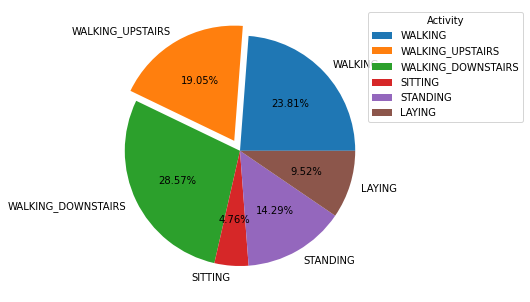

In [33]:
#pie plot for y-train and y-test
label=[i for i in act.values()]
explodes= (0,0.1,0,0,0,0)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
patches,text,auto=ax.pie(y_train[0].unique(),explode=explodes,labels=label,autopct='%1.2f%%')
ax.legend(patches,label,title='Activity',bbox_to_anchor=(1,0,0.5,1))
plt.show()

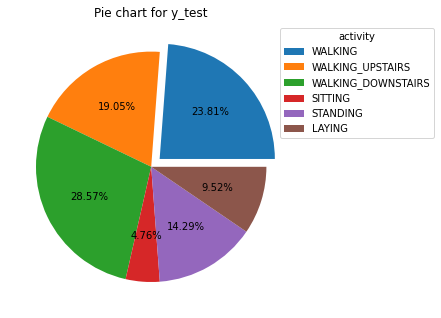

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label=[i for i in act.values()]
explodes=(0.1,0,0,0,0,0)
#ax.pie(y_test[0].unique(),explode=explodes,labels=label,autopct='%1.2f%%')
#plt.show()
patches,text,auto=ax.pie(y_test[0].unique(),explode=explodes,autopct='%1.2f%%')
ax.legend(patches,label,title='activity',bbox_to_anchor =(1, 0, 0.5, 1))
plt.title('Pie chart for y_test')
plt.show()

In order to plot barplot we need to compare either with activity or activity names. So i add both activity and activityname colums to X_test and X_train data and plot the graph using 
Activityname VS Features


In [35]:
X_test['Activity']=y_test[0]
label_name = y_test[0].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
X_test['Activityname']=label_name
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activityname
0,-0.277661,-0.210595,2.192704,-0.787134,-0.833071,-0.093428,-0.807954,-0.838871,-0.104160,-0.824606,-0.917810,0.429119,0.553998,0.736578,0.671360,-0.724224,-0.749151,-0.748380,-0.366156,-0.842049,-0.847803,-0.499409,-0.167049,-0.644391,1.081946,2.079256,-2.463693,1.988002,-0.620985,1.013683,-0.858099,-0.058995,0.000751,-0.383955,0.116159,-0.841318,0.587193,0.539517,-0.914506,-2.286863,...,-0.256858,-0.638311,-0.787543,0.022537,-0.357312,-0.213802,-0.287413,-0.228313,-0.265177,-0.298136,-0.213802,-0.501255,-0.243586,0.391454,-0.719531,-0.066506,-0.569781,-0.528980,-0.444526,-0.476103,-0.465086,-0.480194,-0.224604,-0.444526,-0.522675,-0.481193,0.022839,-0.742541,-0.253620,-0.166362,-0.344707,0.003565,0.357512,-1.363669,0.575389,-0.404722,0.622618,-0.038342,5,STANDING
1,0.198626,0.182560,-0.250221,-0.876836,-0.928903,-0.857905,-0.896993,-0.928791,-0.863122,-0.824606,-0.917810,-0.911639,0.704138,0.884125,0.697899,-0.934606,-0.757707,-0.758225,-0.769473,-0.898302,-0.913574,-0.861592,-0.468749,-0.571833,-0.729154,2.035127,-1.127527,0.275918,0.730582,0.955393,-1.142368,1.289991,-1.500885,0.294738,-0.623604,0.026333,0.365441,0.009598,-0.716027,0.864409,...,-0.619992,-0.638311,-2.617691,0.125523,-0.265139,-0.738276,-0.720441,-0.748056,-0.660132,-0.691610,-0.738276,-0.673284,-0.709465,-0.296071,-0.719531,-0.008286,0.644103,0.464942,-0.695639,-0.603364,-0.629947,-0.618018,-0.652699,-0.695639,-0.565427,-0.690693,-0.300571,-0.742541,-2.300359,0.490938,0.012254,-0.264048,0.030782,-0.747105,1.870875,-0.361677,0.636623,-0.145684,5,STANDING
2,0.024583,-0.318001,-0.228446,-0.921442,-0.933896,-0.906953,-0.916735,-0.933654,-0.912484,-0.910827,-0.968654,-0.884426,0.941282,0.835651,0.792640,-0.952310,-0.759474,-0.757619,-0.775835,-0.896614,-0.915312,-0.904533,-1.177182,-1.391138,-1.096123,1.181117,-0.960161,0.245016,0.388477,0.106670,-0.517272,1.575643,-2.269118,0.705154,-1.316334,2.530072,-2.025302,1.205408,-0.375751,0.524904,...,-0.884884,-0.638311,-0.080607,0.150291,-0.194790,-0.911277,-0.927523,-0.908156,-0.922097,-0.740028,-0.911277,-0.699513,-0.830940,-0.

In [36]:
y_train[0]

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [37]:
X_train['Activity']=y_train[0]
label=y_train[0].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})
X_train['Activityname']=label
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Activityname
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,-0.925922,-0.637335,0.905947,0.868597,0.738333,-0.885856,-0.692984,-0.775644,-0.670450,-0.833906,-0.925354,-0.807493,-0.649854,-1.238142,-1.179915,3.412293,-3.875911,1.632343,-0.821514,1.099997,-1.168223,0.498668,-0.341734,0.941801,-2.304215,1.927601,-0.482235,1.380801,1.899394,1.442179,...,-0.973485,-0.310192,0.665181,-0.566356,-0.542435,-0.856428,-0.831449,-0.870056,-0.769770,-0.601445,-0.856428,-0.648460,-0.856150,-1.002649,-0.701274,-0.291769,2.571168,2.878050,-0.771088,-0.747101,-0.754850,-0.733900,-0.616111,-0.771088,-0.462580,-0.761398,-0.929914,-0.706613,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567,5,STANDING
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,-0.892168,-0.889137,0.895937,0.868597,0.766451,-0.920631,-0.693163,-0.775053,-0.687538,-0.847144,-0.899119,-0.820439,-1.304804,-0.830137,-1.096054,2.375885,-1.753133,1.321646,0.669882,0.551453,-0.545505,0.643302,-1.181562,0.267647,-0.256339,-0.225391,-0.610094,0.307588,0.365758,1.230936,...,-0.973485,0.194685,1.394514,-0.869707,-0.824485,-0.880786,-0.899631,-0.896277,-0.885967,-0.614873,-0.880786,-0.651423,-0.860301,-1.034345,-0.375989,-0.797561,-0.253079,-0.473302,-0.785099,-0.768583,-0.773977,-0.751811,-0.633654,-0.785099,-0.462897,-0.775605,-1.133901,-0.706613,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875,5,STANDING
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,-0.892168,-0.889137,0.880263,0.858575,0.822550,-0.923911,-0.693078,-0.774035,-0.692331,-0.841708,-0.863984,-0.888862,-1.043253,-0.795584,-1.096054,1.271173,-0.766731,1.539137,-1.283172,0.168540,-0.468968,0.872887,-1.413479,0.803481,-0.783648,0.581124,-0.948856,0.001190,0.038347,1.307532,...,-0.973485,-0.141899,1.901832,-1.148059,-0.906665,-0.883649,-0.908012,-0.900977,-0.901861,-0.637193,-0.883649,-0.651644,-0.857979,

**BAR PLOTS**

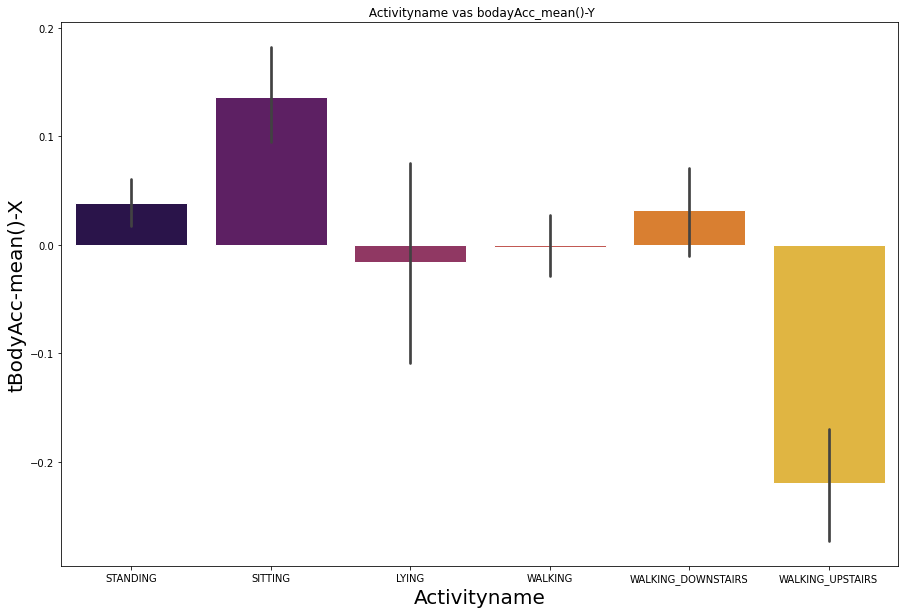

In [38]:
import seaborn as sns  
fig, ax = plt.subplots(figsize=(15,10))
sns.set(style="whitegrid")  
sns.barplot(x='Activityname',y='tBodyAcc-mean()-Y',data=X_train,palette='inferno')
plt.xlabel('Activityname',fontsize=20)
plt.ylabel("tBodyAcc-mean()-X",fontsize=20)
plt.title(" Activityname vas bodayAcc_mean()-Y")
plt.show()

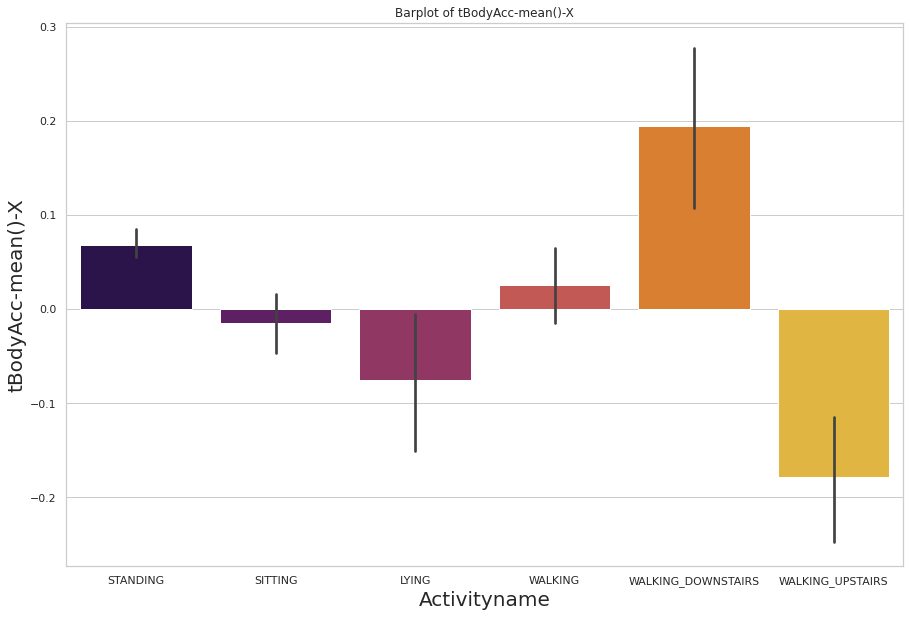

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(style="whitegrid")  
sns.barplot(x='Activityname',y='tBodyAcc-mean()-X',data=X_train,palette='inferno')
plt.xlabel('Activityname',fontsize=20)
plt.ylabel("tBodyAcc-mean()-X",fontsize=20)
plt.title('Barplot of tBodyAcc-mean()-X')
plt.show()

----- In tBodyAcc-mean()-X <0.0 its activity maybe siting,lying,walking_upstairs.
if it is >0.0 then its activity maybe standing,walking,walking_downstairs.

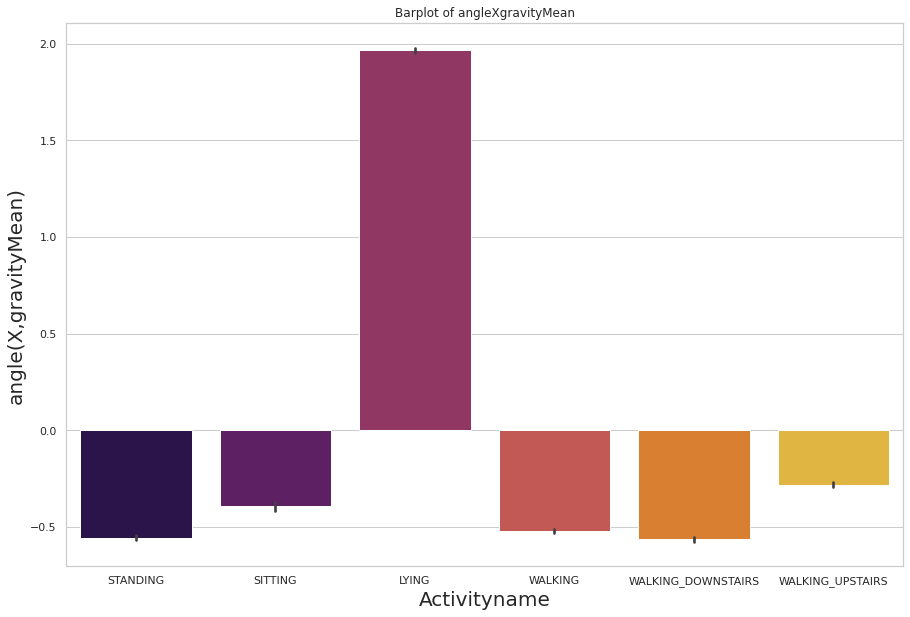

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(style="whitegrid")  
sns.barplot(x='Activityname',y='angle(X,gravityMean)',data=X_train,palette='inferno')
plt.xlabel('Activityname',fontsize=20)
plt.ylabel("angle(X,gravityMean)",fontsize=20)
plt.title('Barplot of angleXgravityMean')
plt.show()


when angle(X,gravityMean)>0.0 then its activity is lying

In [52]:
def class_breakdown(data):
	df = pd.DataFrame(data)
	counts = df.groupby(0).size()
	counts = counts.values
	for i in range(len(counts)):
		percent = counts[i] / len(df) * 100
		print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [50]:
class_breakdown(y_train)

Class=1, total=1226, percentage=16.676
Class=2, total=1073, percentage=14.595
Class=3, total=986, percentage=13.411
Class=4, total=1286, percentage=17.492
Class=5, total=1374, percentage=18.689
Class=6, total=1407, percentage=19.138


In [51]:
class_breakdown(y_test)

Class=1, total=496, percentage=16.831
Class=2, total=471, percentage=15.982
Class=3, total=420, percentage=14.252
Class=4, total=491, percentage=16.661
Class=5, total=532, percentage=18.052
Class=6, total=537, percentage=18.222


In [45]:
trainX = pd.read_table('/content/gdrive/My Drive/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('/content/gdrive/My Drive/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("/content/gdrive/My Drive/UCI HAR Dataset/test/X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('/content/gdrive/My Drive/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

In [46]:
#Normalizing dataset by subtracting with mean and divide by std

mu = trainX.mean(axis=0)
mu1 = testX.mean(axis=0)
stdv = trainX.std(axis = 0)
stdv1 = testX.std(axis = 0)

X_train = (trainX - mu)/stdv   #normalized train set
X_test = (testX - mu1)/stdv1  #normalized test set
y_train = trainy              #train set of labels
y_test = testy               #test set of label 
y = np.array(y_train).ravel()

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **LOGISTIC REGRESSION**

In [48]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,max_iter = 1000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score=accuracy_score(y_test,y_pred)
recall_score=recall_score(y_test,y_pred,average='weighted')
f1_score=f1_score(y_test,y_pred,average='weighted')
print(y_pred)
print(cm)
print(accuracy_score)
print(recall_score)
print(f1_score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5 5 5 ... 2 2 2]
[[484   3   9   0   0   0]
 [ 10 459   2   0   0   0]
 [  1  11 408   0   0   0]
 [  0   1   0 445  44   1]
 [  0   0   0  23 509   0]
 [  0   0   0   0   1 536]]
0.9640312181879878
0.9640312181879878
0.963990121351496


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **DECISION TREE CLASSIFIER**

In [62]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
rank_classifier.fit(X_train,y)
Predictions_test = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
TrainAccuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = Predictions_test)

print("Training Accuracy of Decision Tree: {}".format(TrainAccuracy))
print("Testing Accuracy of Decision Tree: {}".format(TestAccuracy))



Training Accuracy of Decision Tree: 0.9351196953210011
Testing Accuracy of Decision Tree: 0.828978622327791
